In [1]:
import scanpy as sc
import pandas as pd
from pathlib import Path
import anndata as ad
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/data_integration/")

In [3]:
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

In [4]:
DIR2SAVE.mkdir(parents=True, exist_ok=True)
FIG2SAVE.mkdir(parents=True, exist_ok=True)

### Load separate data sources (after scrublet and QC, raw counts, CRC only)

In [5]:
print("Loading datasets: ")
# SMC
adata_smc = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/scrublet_qc/Lee2020_SMC_CRC_raw_scrublet_qc.h5ad"
)
print("SMC: ", adata_smc.shape)
print(set(adata_smc.obs.Tissue))

# KUL
adata_kul = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/scrublet_qc/Lee2020_KUL_CRC_raw_scrublet_qc.h5ad"
)
print("KUL: ", adata_kul.shape)
print(set(adata_kul.obs.Tissue))

# Pelka
adata_pelka = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/scrublet_qc/Pelka2021_CRC_raw_scrublet_qc.h5ad"
)
print("Pelka: ", adata_pelka.shape)
print(set(adata_pelka.obs.Tissue))

# Che2021
adata_che2021 = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/scrublet_qc/Che2021_CRC_raw_scrublet_qc.h5ad"
)
print("Che2021: ", adata_che2021.shape)
print(set(adata_che2021.obs.Tissue))

# Wu2022
adata_wu2022 = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/scrublet_qc/Wu2022_CRC_raw_scrublet_qc.h5ad"
)
print("Wu2022: ", adata_wu2022.shape)
print(set(adata_wu2022.obs.Tissue))

Loading datasets: 
SMC:  (47201, 33578)
{'CRC'}
KUL:  (8212, 33578)
{'CRC'}
Pelka:  (190947, 42974)
{'CRC'}
Che2021:  (52405, 33578)
{'CRC'}
Wu2022:  (29298, 20497)
{'CRC'}


### Select only relevant columns

In [6]:
def format_adata(adata):
    """Select only relevant info for merging datasets, assumes raw is in .X"""
    return ad.AnnData(
        X=adata.X.copy(),  # take raw counts
        obs=adata.obs[
            [
                "Patient",
                "Sample",
                "Cell_type",
                "Cell_subtype",
                "Tissue",
                "Therapy",
                "doublet_score",
                "predicted_doublet",
                "n_genes_by_counts",
                "total_counts",
                "total_counts_mt",
                "pct_counts_mt",
                "total_counts_ribo",
                "pct_counts_ribo",
            ]
        ],
        var=adata.var[
            [
                "n_cells_by_counts",
                "total_counts",
                "mean_counts",
                "pct_dropout_by_counts",
            ]
        ],
    )

In [7]:
adata_smc_format = format_adata(adata_smc)
adata_smc_format

AnnData object with n_obs × n_vars = 47201 × 33578
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts'

In [8]:
adata_kul_format = format_adata(adata_kul)
adata_kul_format

AnnData object with n_obs × n_vars = 8212 × 33578
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts'

In [9]:
adata_pelka_format = format_adata(adata_pelka)
adata_pelka_format

AnnData object with n_obs × n_vars = 190947 × 42974
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts'

In [10]:
adata_che2021_format = format_adata(adata_che2021)
adata_che2021_format

AnnData object with n_obs × n_vars = 52405 × 33578
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts'

In [11]:
adata_wu2022_format = format_adata(adata_wu2022)
adata_wu2022_format

AnnData object with n_obs × n_vars = 29298 × 20497
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells_by_counts', 'total_counts', 'mean_counts', 'pct_dropout_by_counts'

### Check that the data is raw 

In [12]:
np.max(adata_smc_format.X)

26489.0

In [13]:
np.max(adata_kul_format.X)

21283.0

In [14]:
np.max(adata_pelka_format.X)

59020.0

In [15]:
np.max(adata_che2021_format.X)

22428.0

In [16]:
np.max(adata_wu2022_format.X)

43586.0

In [17]:
adata_kul_format.var

,n_cells_by_counts,total_counts,mean_counts,pct_dropout_by_counts
RP11-34P13.3,0,0.0,0.000000,100.000000
FAM138A,0,0.0,0.000000,100.000000
OR4F5,0,0.0,0.000000,100.000000
RP11-34P13.7,10,10.0,0.001212,99.878847
RP11-34P13.8,0,0.0,0.000000,100.000000
...,...,...,...,...
AC233755.2,5,6.0,0.000727,99.939423
AC233755.1,7,9.0,0.001090,99.915193
AC240274.1,172,183.0,0.022171,97.916162
AC213203.1,0,0.0,0.000000,100.000000


In [18]:
adata_smc_format.var

,n_cells_by_counts,total_counts,mean_counts,pct_dropout_by_counts
A1BG,4163,5384.0,0.113863,91.195940
A1BG-AS1,487,503.0,0.010638,98.970075
A1CF,2610,3582.0,0.075753,94.480279
A2M,3956,16921.0,0.357851,91.633710
A2M-AS1,217,222.0,0.004695,99.541081
...,...,...,...,...
ZZZ3,4509,5245.0,0.110923,90.464206
bP-21264C1.2,167,168.0,0.003553,99.646822
bP-2171C21.3,0,0.0,0.000000,100.000000
bP-2189O9.3,8,8.0,0.000169,99.983081


In [19]:
adata_kul_format.var

,n_cells_by_counts,total_counts,mean_counts,pct_dropout_by_counts
RP11-34P13.3,0,0.0,0.000000,100.000000
FAM138A,0,0.0,0.000000,100.000000
OR4F5,0,0.0,0.000000,100.000000
RP11-34P13.7,10,10.0,0.001212,99.878847
RP11-34P13.8,0,0.0,0.000000,100.000000
...,...,...,...,...
AC233755.2,5,6.0,0.000727,99.939423
AC233755.1,7,9.0,0.001090,99.915193
AC240274.1,172,183.0,0.022171,97.916162
AC213203.1,0,0.0,0.000000,100.000000


In [20]:
adata_pelka_format.var

,n_cells_by_counts,total_counts,mean_counts,pct_dropout_by_counts
RP11-34P13.3,3,3.0,0.000012,99.998834
FAM138A,0,0.0,0.000000,100.000000
OR4F5,1,1.0,0.000004,99.999611
RP11-34P13.7,870,880.0,0.003421,99.661809
RP11-34P13.8,14,14.0,0.000054,99.994558
...,...,...,...,...
ADT-TCRgd,0,0.0,0.000000,100.000000
ADT-TCRab,0,0.0,0.000000,100.000000
ADT-CD1c,0,0.0,0.000000,100.000000
ADT-CD141,0,0.0,0.000000,100.000000


In [21]:
adata_che2021_format.var

,n_cells_by_counts,total_counts,mean_counts,pct_dropout_by_counts
RP11-34P13.3,0,0.0,0.000000,100.000000
FAM138A,0,0.0,0.000000,100.000000
OR4F5,0,0.0,0.000000,100.000000
RP11-34P13.7,37,37.0,0.000664,99.933614
RP11-34P13.8,0,0.0,0.000000,100.000000
...,...,...,...,...
AC233755.2,11,32.0,0.000574,99.980264
AC233755.1,18,19.0,0.000341,99.967704
AC240274.1,313,321.0,0.005759,99.438414
AC213203.1,0,0.0,0.000000,100.000000


In [22]:
adata_wu2022_format.var

,n_cells_by_counts,total_counts,mean_counts,pct_dropout_by_counts
features,,,,
AL627309.1,19,19.0,0.000636,99.936361
FAM87B,12,12.0,0.000402,99.959807
LINC00115,208,213.0,0.007134,99.303323
FAM41C,111,113.0,0.003785,99.628215
SAMD11,75,87.0,0.002914,99.748794
...,...,...,...,...
AC007325.4,235,238.0,0.007972,99.212889
AL354822.1,109,109.0,0.003651,99.634914
AC233755.2,41,432.0,0.014469,99.862674


### Merge all datasets into single adata 

In [23]:
adata_crc = adata_smc_format.concatenate(
    adata_kul_format,
    adata_pelka_format,
    adata_che2021_format,
    adata_wu2022_format,
    batch_key="cell_source",
    batch_categories=["SMC", "KUL", "Pelka", "Che", "Wu"],
    join="outer",
)

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [24]:
adata_crc.shape

(328063, 49325)

In [25]:
adata_crc

AnnData object with n_obs × n_vars = 328063 × 49325
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'cell_source'
    var: 'n_cells_by_counts-Che', 'total_counts-Che', 'mean_counts-Che', 'pct_dropout_by_counts-Che', 'n_cells_by_counts-KUL', 'total_counts-KUL', 'mean_counts-KUL', 'pct_dropout_by_counts-KUL', 'n_cells_by_counts-Pelka', 'total_counts-Pelka', 'mean_counts-Pelka', 'pct_dropout_by_counts-Pelka', 'n_cells_by_counts-SMC', 'total_counts-SMC', 'mean_counts-SMC', 'pct_dropout_by_counts-SMC', 'n_cells_by_counts-Wu', 'total_counts-Wu', 'mean_counts-Wu', 'pct_dropout_by_counts-Wu'

In [26]:
# set dtype of .obs variables to category
adata_crc.obs["Tissue"] = adata_crc.obs["Tissue"].astype("category")
adata_crc.obs["Therapy"] = adata_crc.obs["Therapy"].astype("category")
adata_crc.obs["cell_source"] = adata_crc.obs["cell_source"].astype("category")
adata_crc.obs["Cell_type"] = adata_crc.obs["Cell_type"].astype("category")
adata_crc.obs["Cell_subtype"] = adata_crc.obs["Cell_subtype"].astype("category")
adata_crc.obs["Patient"] = adata_crc.obs["Patient"].astype("category")
adata_crc.obs["Sample"] = adata_crc.obs["Sample"].astype("category")

In [27]:
sc.pp.filter_genes(
    adata_crc, min_cells=1
)  # just to reduce the size of the data, remove genes that have no cells

In [28]:
adata_crc

AnnData object with n_obs × n_vars = 328063 × 39609
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'cell_source'
    var: 'n_cells_by_counts-Che', 'total_counts-Che', 'mean_counts-Che', 'pct_dropout_by_counts-Che', 'n_cells_by_counts-KUL', 'total_counts-KUL', 'mean_counts-KUL', 'pct_dropout_by_counts-KUL', 'n_cells_by_counts-Pelka', 'total_counts-Pelka', 'mean_counts-Pelka', 'pct_dropout_by_counts-Pelka', 'n_cells_by_counts-SMC', 'total_counts-SMC', 'mean_counts-SMC', 'pct_dropout_by_counts-SMC', 'n_cells_by_counts-Wu', 'total_counts-Wu', 'mean_counts-Wu', 'pct_dropout_by_counts-Wu', 'n_cells'

In [29]:
adata_crc.obs

,Patient,Sample,Cell_type,Cell_subtype,Tissue,Therapy,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,cell_source
SMC01-T_AAACCTGCATACGCCG-SMC,SMC01,SMC01-T,Epithelial cells,CMS2,CRC,naive,0.089005,False,4866,38052.0,4917.0,12.921791,8800.0,23.126249,SMC
SMC01-T_AAACCTGGTCGCATAT-SMC,SMC01,SMC01-T,Epithelial cells,CMS2,CRC,naive,0.089005,False,5268,33750.0,2957.0,8.761481,7815.0,23.155556,SMC
SMC01-T_AAACCTGTCCCTTGCA-SMC,SMC01,SMC01-T,Epithelial cells,CMS2,CRC,naive,0.033954,False,1714,7356.0,1450.0,19.711800,2574.0,34.991844,SMC
SMC01-T_AAACGGGAGGGAAACA-SMC,SMC01,SMC01-T,Epithelial cells,CMS2,CRC,naive,0.121019,False,1229,3752.0,358.0,9.541578,1143.0,30.463753,SMC
SMC01-T_AAACGGGGTATAGGTA-SMC,SMC01,SMC01-T,Epithelial cells,CMS2,CRC,naive,0.121019,False,3914,23991.0,4154.0,17.314825,2913.0,12.142054,SMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P17_Colon_T_TAAGCCATCTATCGCC-1-Wu,Wu2021_P17,P17_Colon_T,B,TCL1A+ Naive B cells,CRC,naive,0.214545,False,515,880.0,14.0,1.590909,250.0,28.409090,Wu
P17_Colon_T_TATACCTTCTAGTTCT-1-Wu,Wu2021_P17,P17_Colon_T,B,TCL1A+ Naive B cells,CRC,naive,0.171779,False,532,1056.0,28.0,2.651515,386.0,36.553032,Wu
P17_Colon_T_TTCTGTAGTGCATTAC-1-Wu,Wu2021_P17,P17_Colon_T,B,AIM2+ Memory B cells,CRC,naive,0.171779,False,757,1686.0,57.0,3.380783,520.0,30.842230,Wu
P19_Colon_T_TCTAACTGTTGCTGAT-1-Wu,Wu2021_P19,P19_Colon_T,B,AIM2+ Memory B cells,CRC,NAC,0.023923,False,642,1457.0,51.0,3.500343,569.0,39.052849,Wu


In [30]:
adata_crc.var

,n_cells_by_counts-Che,total_counts-Che,mean_counts-Che,pct_dropout_by_counts-Che,n_cells_by_counts-KUL,total_counts-KUL,mean_counts-KUL,pct_dropout_by_counts-KUL,n_cells_by_counts-Pelka,total_counts-Pelka,...,pct_dropout_by_counts-Pelka,n_cells_by_counts-SMC,total_counts-SMC,mean_counts-SMC,pct_dropout_by_counts-SMC,n_cells_by_counts-Wu,total_counts-Wu,mean_counts-Wu,pct_dropout_by_counts-Wu,n_cells
5S_rRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,...,99.996890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5S_rRNA_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,99.999611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5S_rRNA_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,57.0,...,99.978231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
7SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,...,99.994947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7SK_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.0,320.0,...,99.877551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoU13_97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,...,99.996890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
snoU13_98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,...,99.995724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
snoU2-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,28.0,...,99.989116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
snoU2_19_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,...,99.994558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [31]:
adata_crc.var["n_cells_by_counts-Che"].isna().sum()

9327

In [32]:
# check if data contains MT genes
adata_crc.var_names.str.startswith("MT-").any()

False

In [33]:
# check if data contains ribosomal genes
adata_crc.var_names.str.startswith(("RPS", "RPL")).any()

False

### Set colours for dataset, use file colours excel 

 `'SMC':'#ffd92f',
 'KUL':'#a6d854',
 'Pelka':'#e78ac3',
 'Che':'#8da0cb',
 'Wu':'#fc8d62',`

In [35]:
# set colours for dataset, need to know order
adata_crc.obs.cell_source.cat.categories.values.tolist()

['SMC', 'KUL', 'Pelka', 'Che', 'Wu']

In [36]:
adata_crc.uns["cell_source_colors"] = [
    "#ffd92f",
    "#a6d854",
    "#e78ac3",
    "#8da0cb",
    "#fc8d62",
]

In [37]:
# set colours for therapy
adata_crc.obs.Therapy.cat.categories

Index(['NAC', 'naive'], dtype='object')

In [38]:
adata_crc.uns["Therapy_colors"] = ["#ff7f00", "#377eb8"]

In [39]:
# set colour for tissue: here only CRC so
adata_crc.uns["Tissue_colors"] = ["#d01c8b"]

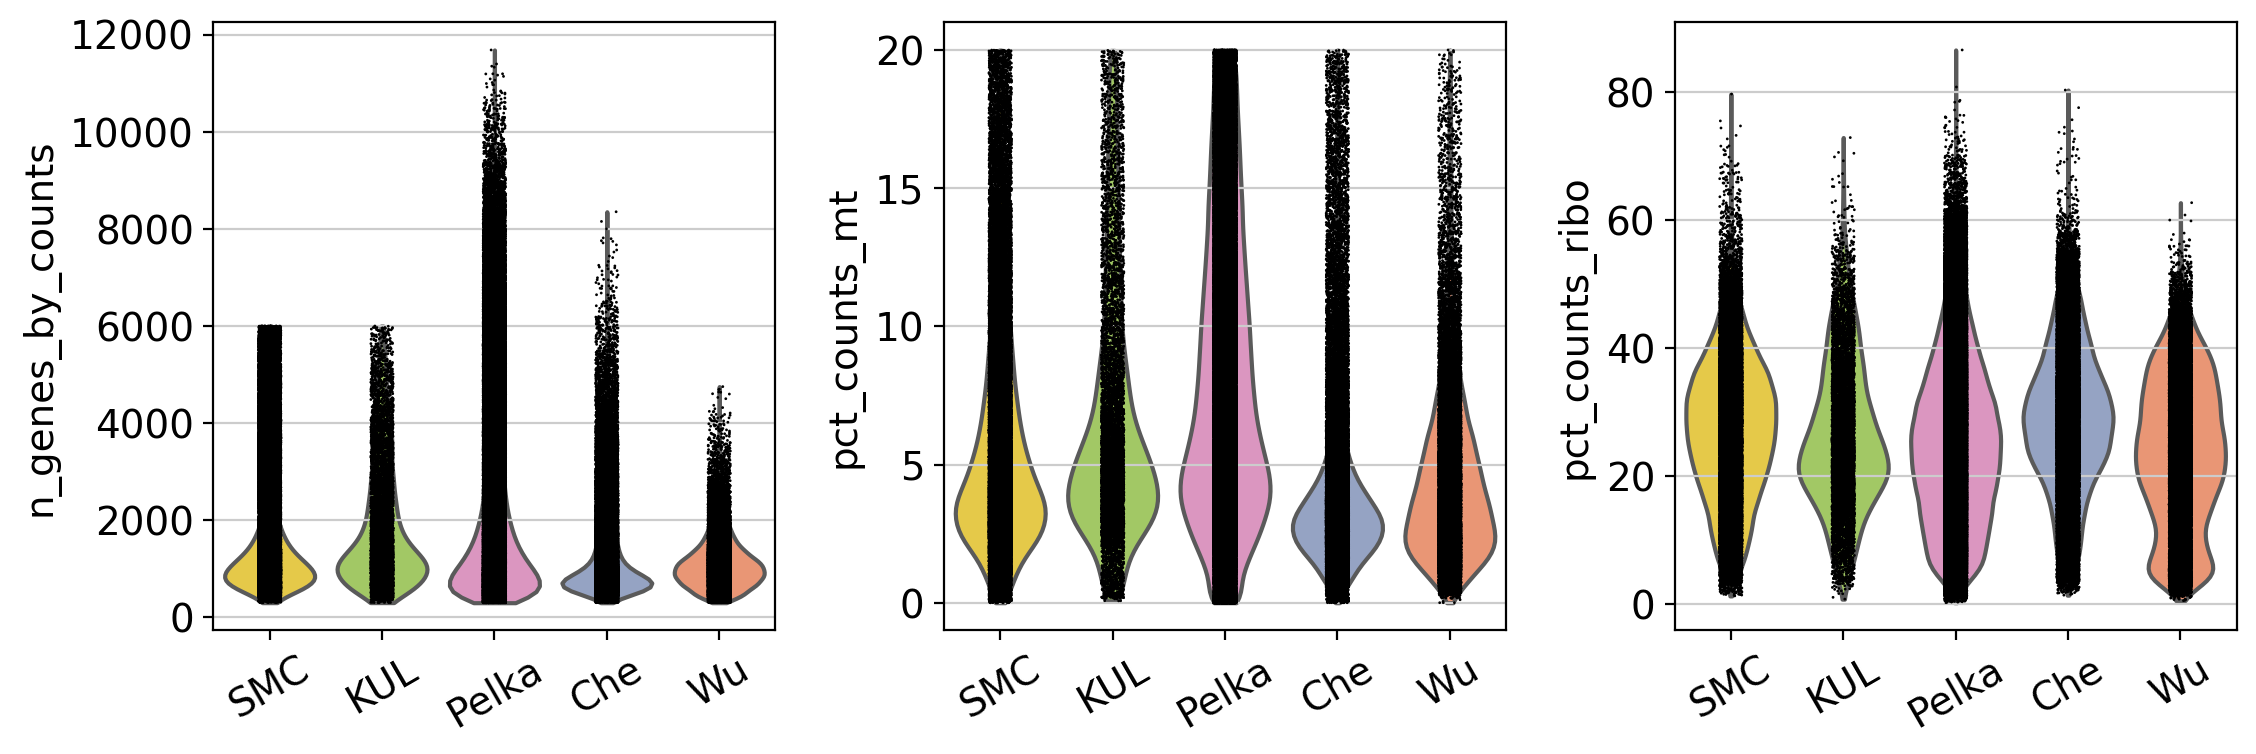

In [40]:
# violin plot of some distributions
sc.pl.violin(
    adata_crc,
    keys=["n_genes_by_counts", "pct_counts_mt", "pct_counts_ribo"],
    groupby="cell_source",
    jitter=0.1,
    multi_panel=True,
    rotation=30,
    show=True,
    save="QC_covariates.pdf",
)

In [41]:
adata_crc

AnnData object with n_obs × n_vars = 328063 × 39609
    obs: 'Patient', 'Sample', 'Cell_type', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'cell_source'
    var: 'n_cells_by_counts-Che', 'total_counts-Che', 'mean_counts-Che', 'pct_dropout_by_counts-Che', 'n_cells_by_counts-KUL', 'total_counts-KUL', 'mean_counts-KUL', 'pct_dropout_by_counts-KUL', 'n_cells_by_counts-Pelka', 'total_counts-Pelka', 'mean_counts-Pelka', 'pct_dropout_by_counts-Pelka', 'n_cells_by_counts-SMC', 'total_counts-SMC', 'mean_counts-SMC', 'pct_dropout_by_counts-SMC', 'n_cells_by_counts-Wu', 'total_counts-Wu', 'mean_counts-Wu', 'pct_dropout_by_counts-Wu', 'n_cells'
    uns: 'cell_source_colors', 'Therapy_colors', 'Tissue_colors'

In [42]:
adata_crc.var.columns

Index(['n_cells_by_counts-Che', 'total_counts-Che', 'mean_counts-Che',
       'pct_dropout_by_counts-Che', 'n_cells_by_counts-KUL',
       'total_counts-KUL', 'mean_counts-KUL', 'pct_dropout_by_counts-KUL',
       'n_cells_by_counts-Pelka', 'total_counts-Pelka', 'mean_counts-Pelka',
       'pct_dropout_by_counts-Pelka', 'n_cells_by_counts-SMC',
       'total_counts-SMC', 'mean_counts-SMC', 'pct_dropout_by_counts-SMC',
       'n_cells_by_counts-Wu', 'total_counts-Wu', 'mean_counts-Wu',
       'pct_dropout_by_counts-Wu', 'n_cells'],
      dtype='object')

In [43]:
np.max(adata_crc.X)

59020.0

In [44]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/data_integration')

In [45]:
adata_crc.write(DIR2SAVE.joinpath("SMC_KUL_Pelka_Che_Wu_CRC_raw.h5ad"))

### Check that the Patient names are all there 

In [46]:
len(set(adata_crc.obs.Patient))

117

In [47]:
(
    len(set(adata_smc_format.obs.Patient))
    + len(set(adata_kul_format.obs.Patient))
    + len(set(adata_pelka_format.obs.Patient))
    + len(set(adata_che2021_format.obs.Patient))
    + len(set(adata_wu2022_format.obs.Patient))
)

117

In [48]:
adata_crc = sc.read_h5ad(DIR2SAVE.joinpath("SMC_KUL_Pelka_Che_Wu_CRC_raw.h5ad"))

In [49]:
adata_crc.obs.describe()

,doublet_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
count,328063.000000,328063.000000,328063.000000,328063.000000,328063.000000,328063.000000,328063.000000
mean,0.093181,1900.005868,10518.965820,922.936279,6.785720,2704.186279,26.010187
std,0.070990,1632.763365,16959.675781,2171.036621,4.864671,5328.191406,12.153420
min,0.002188,300.000000,490.000000,0.000000,0.000000,1.000000,0.142857
25%,0.046025,768.000000,2004.000000,81.000000,3.046595,495.000000,17.037008
50%,0.077640,1246.000000,3900.000000,203.000000,5.241158,943.000000,25.742304
75%,0.120000,2509.000000,12340.000000,756.000000,9.715339,2214.000000,34.274952
max,0.913462,11683.000000,370457.000000,67131.000000,19.999336,113586.000000,86.590645


In [50]:
adata_crc.obs[adata_crc.obs.cell_source == "SMC"].describe()

,doublet_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
count,47201.000000,47201.000000,47201.000000,47201.000000,47201.000000,47201.000000,47201.000000
mean,0.095828,2065.818648,10726.493164,791.402466,5.837282,3046.962646,27.245039
std,0.068667,1496.618702,11704.665039,1186.638062,4.090591,3949.260010,10.942033
min,0.006040,301.000000,1001.000000,0.000000,0.000000,17.000000,1.204819
25%,0.049505,873.000000,2365.000000,85.000000,2.929427,595.000000,19.477081
50%,0.080725,1384.000000,4568.000000,186.000000,4.589041,1145.000000,27.477652
75%,0.121951,3195.000000,16668.000000,1140.000000,7.763485,4197.000000,34.861954
max,0.839286,5999.000000,84106.000000,11933.000000,19.995094,41086.000000,79.701256


In [51]:
adata_crc.obs[adata_crc.obs.cell_source == "KUL"].describe()

,doublet_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
count,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000,8212.000000
mean,0.074757,1926.034218,7826.678711,509.492340,6.457604,1858.747314,26.338821
std,0.058799,1305.017336,7899.036621,774.905273,4.424505,1956.461426,11.647120
min,0.007257,302.000000,1002.000000,1.000000,0.067568,11.000000,0.702189
25%,0.038835,944.000000,2609.750000,130.000000,3.400053,642.000000,18.259478
50%,0.062185,1441.500000,4494.000000,240.000000,5.070282,1201.500000,24.613073
75%,0.092742,2698.000000,10426.750000,541.000000,8.331008,2325.000000,33.978238
max,0.825243,5998.000000,50908.000000,9183.000000,19.983486,22868.000000,72.888428


In [52]:
adata_crc.obs[adata_crc.obs.cell_source == "Pelka"].describe()

,doublet_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
count,190947.000000,190947.000000,190947.000000,190947.000000,190947.000000,190947.000000,190947.000000
mean,0.088098,2137.573918,12719.651367,1280.790649,8.175702,3271.154785,25.224674
std,0.065400,1840.435791,20457.126953,2703.575684,5.149575,6472.038086,12.603827
min,0.002188,300.000000,501.000000,0.000000,0.000000,1.000000,0.142857
25%,0.043384,791.000000,2069.000000,109.000000,3.991958,490.000000,15.512075
50%,0.075441,1420.000000,4793.000000,326.000000,7.136715,1014.000000,24.541920
75%,0.115987,2965.000000,14964.000000,1239.000000,11.944251,2698.000000,33.657768
max,0.913462,11683.000000,370457.000000,67131.000000,19.999336,113586.000000,86.590645


In [53]:
adata_crc.obs[adata_crc.obs.cell_source == "Che"].describe()

,doublet_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
count,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000,52405.000000
mean,0.101786,1308.828451,5778.940430,222.311920,3.896214,1515.125977,28.943218
std,0.085327,992.063584,7727.134277,415.782654,3.020901,2339.221191,11.166855
min,0.002962,300.000000,533.000000,0.000000,0.000000,16.000000,1.321877
25%,0.047801,671.000000,1751.000000,51.000000,2.180685,493.000000,21.636040
50%,0.079681,914.000000,2636.000000,89.000000,3.101604,800.000000,28.821880
75%,0.126471,1589.000000,6249.000000,211.000000,4.418103,1541.000000,36.258064
max,0.800000,8351.000000,133603.000000,9823.000000,19.994276,47049.000000,80.321213


In [54]:
adata_crc.obs[adata_crc.obs.cell_source == "Wu"].describe()

,doublet_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
count,29298.000000,29298.000000,29298.000000,29298.000000,29298.000000,29298.000000,29298.000000
mean,0.111817,1134.679637,5074.910156,171.647217,4.515037,820.620361,23.801855
std,0.078814,553.513046,6689.919434,203.645599,3.038224,589.228210,11.742233
min,0.006274,300.000000,490.000000,0.000000,0.000000,7.000000,0.463464
25%,0.057432,753.000000,1782.000000,63.000000,2.328573,395.000000,14.967078
50%,0.092105,1031.000000,2847.000000,121.000000,3.817410,678.000000,23.985936
75%,0.145000,1383.000000,4548.000000,211.000000,5.919828,1104.750000,32.869667
max,0.843478,4750.000000,76914.000000,7422.000000,19.998964,6389.000000,62.703079
